## Import Librery

In [6]:
#main Libraries
import pandas as pd
from pandas import DataFrame
import os
import numpy as np
#visualisation libreries
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

from fbprophet import Prophet
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance 
from skmultilearn.problem_transform import ClassifierChain 
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn import metrics
#Library for training
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ImportError: cannot import name 'NA' from 'pandas._libs.missing' (C:\ProgramData\Anaconda3\lib\site-packages\pandas\_libs\missing.cp37-win_amd64.pyd)

In [3]:
data_set = pd.read_csv("data_agriculture.csv", engine='python', index_col = 0)
data_set

NameError: name 'pd' is not defined

In [4]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.isnull(), cbar = False, cmap = 'YlGnBu')

NameError: name 'plt' is not defined

## Cleaning dataset

In [292]:
data = data_set.copy()

In [293]:
data.isnull().sum()

date           1901
area           1901
dayAvgRhm         0
dayAvgTa          0
dayAvgWs          0
dayMaxTa          0
dayMinRhm         0
daySumRn          0
daySumSs          0
paCropName     1901
paCropSpeId    1901
dtype: int64

In [294]:
data = data.drop(['paCropSpeId', 'paCropName'], axis=1)

In [295]:
### dropping null 
data = data.dropna(how='any')

In [296]:
data.isnull().sum()

date         0
area         0
dayAvgRhm    0
dayAvgTa     0
dayAvgWs     0
dayMaxTa     0
dayMinRhm    0
daySumRn     0
daySumSs     0
dtype: int64

In [297]:
# checking data type 
for dtype in data.dtypes.iteritems(): 
    print(dtype)

('date', dtype('O'))
('area', dtype('O'))
('dayAvgRhm', dtype('int64'))
('dayAvgTa', dtype('int64'))
('dayAvgWs', dtype('int64'))
('dayMaxTa', dtype('int64'))
('dayMinRhm', dtype('int64'))
('daySumRn', dtype('int64'))
('daySumSs', dtype('int64'))


In [298]:
#transform string to day time 
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')
data.date.head()

idx
2   2017-01-05
4   2017-01-27
5   2017-01-07
7   2017-01-03
9   2017-01-06
Name: date, dtype: datetime64[ns]

## Feature Modelisation

In [299]:
#Month & Day
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.head(10000)

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,month,day
idx,,,,,,,,,,,
2,2017-01-05,춘천,74,2,1,7,52,0,0,1,5
4,2017-01-27,춘천,62,-1,2,2,33,5,8,1,27
5,2017-01-07,춘천,89,0,0,7,54,0,4,1,7
7,2017-01-03,춘천,78,0,1,7,31,0,5,1,3
9,2017-01-06,춘천,77,3,0,10,41,0,7,1,6
...,...,...,...,...,...,...,...,...,...,...,...
5669,2020-12-18,제주,57,7,3,10,42,0,1,12,18
5670,2020-12-06,제주,60,8,1,11,48,0,8,12,6
5671,2020-12-31,제주,68,2,6,4,49,3,0,12,31


In [300]:
### Label 
data['radsish'] = ((data.dayAvgTa < 21) & (data.dayAvgTa > 14))

In [301]:
data

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,month,day,radsish
idx,,,,,,,,,,,,
2,2017-01-05,춘천,74,2,1,7,52,0,0,1,5,False
4,2017-01-27,춘천,62,-1,2,2,33,5,8,1,27,False
5,2017-01-07,춘천,89,0,0,7,54,0,4,1,7,False
7,2017-01-03,춘천,78,0,1,7,31,0,5,1,3,False
9,2017-01-06,춘천,77,3,0,10,41,0,7,1,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5669,2020-12-18,제주,57,7,3,10,42,0,1,12,18,False
5670,2020-12-06,제주,60,8,1,11,48,0,8,12,6,False
5671,2020-12-31,제주,68,2,6,4,49,3,0,12,31,False


## separate train with test

In [302]:
features = ['area', 'month']

In [303]:
X = data[features].values # we exclud date and idx
y = data.iloc[:, -1].values

In [304]:
print(X)

[['춘천' 1]
 ['춘천' 1]
 ['춘천' 1]
 ...
 ['제주' 12]
 ['제주' 12]
 ['제주' 12]]


In [305]:
print(y)

[False False False ... False False False]


In [306]:
## feature variable Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [307]:
print(X)

[[0.0 1.0 0.0 1]
 [0.0 1.0 0.0 1]
 [0.0 1.0 0.0 1]
 ...
 [1.0 0.0 0.0 12]
 [1.0 0.0 0.0 12]
 [1.0 0.0 0.0 12]]


In [308]:
## Encoding Label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Splitting the dataset into Trasining and Test set

In [309]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [310]:
print(X_train)

[[0.0 1.0 0.0 12]
 [1.0 0.0 0.0 3]
 [1.0 0.0 0.0 2]
 ...
 [0.0 0.0 1.0 4]
 [1.0 0.0 0.0 4]
 [1.0 0.0 0.0 9]]


In [311]:
print(X_test)

[[0.0 1.0 0.0 7]
 [0.0 0.0 1.0 1]
 [0.0 0.0 1.0 7]
 ...
 [0.0 1.0 0.0 9]
 [0.0 1.0 0.0 11]
 [0.0 0.0 1.0 3]]


In [312]:
print(y_train)

[0 0 0 ... 1 1 0]


## Feature Scaling 

In [313]:
X_train[:, 2:]

array([[0.0, 12],
       [0.0, 3],
       [0.0, 2],
       ...,
       [1.0, 4],
       [0.0, 4],
       [0.0, 9]], dtype=object)

In [314]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

In [315]:
X_train

array([[-0.72263393,  1.42447059, -0.69676046,  1.57452673],
       [ 1.38382652, -0.70201519, -0.69676046, -0.97698463],
       [ 1.38382652, -0.70201519, -0.69676046, -1.26048589],
       ...,
       [-0.72263393, -0.70201519,  1.43521348, -0.69348337],
       [ 1.38382652, -0.70201519, -0.69676046, -0.69348337],
       [ 1.38382652, -0.70201519, -0.69676046,  0.72402295]])

In [316]:
## training with random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [317]:
print(classifier.predict(sc.transform([[0.0, 0.0, 1.0, 5]])))

[1]


In [318]:
## predicting the test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [319]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[572  43]
 [ 55  85]]


0.8701986754966887

## vizualization 

TypeError: Too many arguments to contourf; see help(contourf)

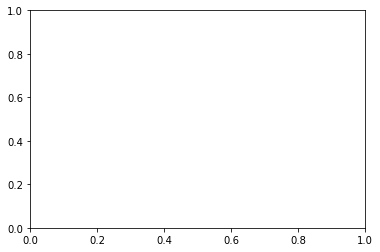

In [322]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2, X3, X4 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 2].min() - 10, stop = X_set[:, 2].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 3].min() - 10, stop = X_set[:, 3].max() + 10, step = 0.25)
                    )
plt.contourf(X1, X2, X3, X3, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel(), X3.ravel(), X4.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlim(X3.min(), X3.max())
plt.ylim(X4.min(), X4.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Month')
plt.ylabel('can produce or not')
plt.legend()
plt.show()